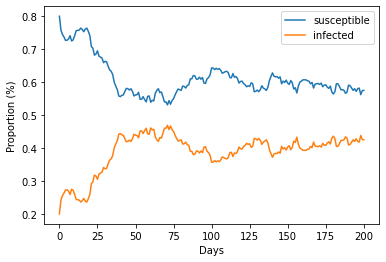

In [5]:
# ==== Econ-based SIQ ====

import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import random

# --- Parameters setting --- #
probTrans = 0.3
probRecover = 0.1
initNmS = 8*100 #Number of Susceptible agents in the initial health
initNmI = 2*100 #Number of Infected agents in the initial health
Population = initNmS+initNmI
numDays = 200
capQ = 0.15*Population #Capacity of quarantine
JoyTown = 1.1 #base utility

# --- Agent's class --- #
class Agent():
    #constructor
    def __init__(self,health='S'):
        self.health=health #health='S'(default) or 'I'
        self.loc='T'  
        
    #a method to update an agent's health
    def health_update(self):
        if (self.health,self.loc)==('S','T'):
            opponent=random.choice([agent for agent in listAllAgents if agent.loc=='T'])
            if opponent.health=='I':
                if random.uniform(0,1)<probTrans:
                    self.health='I'
                    if len([agent for agent in listAllAgents if agent.loc=="Q"])<capQ:
                        #if there is a room to be quarantined
                        self.loc='Q'
        else:
            if random.uniform(0,1)<probRecover:
                self.health='S'

    #a method to update an agent's location
    def loc_update(self,propIinT):
        if (self.health,self.loc)!=('I','Q'):
            if random.uniform(0,1)<JoyTown-propIinT:
                self.loc='T'
            else:
                self.loc='H'

# --- Prepare some other functions ---

# Generate a list of agents' health from the list of agents
def list_healths(listAllAgents):
    return([agent.health for agent in listAllAgents])

# Calculate the proportion of each health states (s and i) from a list of agents
def count_prop(listAllAgents):
    listHealth = list_healths(listAllAgents)
    return listHealth.count('S')/len(listAllAgents), listHealth.count('I')/len(listAllAgents)

# A function to calculate the proportion of Infected among all agents in town from the list of agents
def prop_IinT(listAllAgents):
    return(len([agent for agent in listAllAgents if (agent.health, agent.loc) == ('I','T')])/len([agent for agent in listAllAgents if agent.loc == 'T']) )

# --- Initial state --- #
listAllAgents = [Agent('S') for i in range(initNmS)] + [Agent('I') for i in range(initNmI)]
histPropS = []
histPropI = []

propS, propI = count_prop(listAllAgents)
histPropS.append(propS)
histPropI.append(propI)
currPropIinT = prop_IinT(listAllAgents)

# ---- Run simulation --- #
for day in range(numDays):
    for agent in listAllAgents:
        agent.health_update()
        agent.loc_update(currPropIinT)
    propS, propI = count_prop(listAllAgents)
    histPropS.append(propS)
    histPropI.append(propI)
    currPropIinT = prop_IinT(listAllAgents)

# --- Plot --- #
plt.plot(histPropS, label='susceptible')
plt.plot(histPropI, label='infected')
plt.legend()
plt.xlabel('Days')
plt.ylabel("Proportion (%)")
plt.show()